<h1 align=center> Pandas In Depth With Practical Example </h1>

Pandas is a powerful and flexible data analysis library for Python. It is built on top of NumPy and provides high-performance, easy-to-use data structures and data analysis tools.

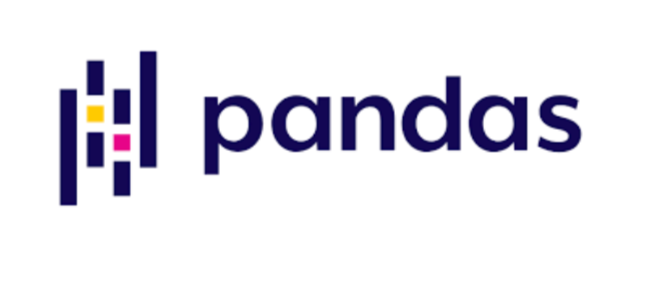

### Installation

In [ ]:
!pip install pandas

In [3]:
import pandas as pd
print(pd.__version__)

1.5.3


### ### 1. **Pandas Data Structures**

Pandas primarily provides two data structures: `Series` and `DataFrame`.

- **Series**: A one-dimensional array-like object that can hold any data type. It is labeled with an index.
- **DataFrame**: A two-dimensional labeled data structure with columns of potentially different types. It is essentially a table with rows and columns.

**Creating a Series:**

In [5]:
import pandas as pd
import numpy as np

# Creating a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


**Creating a DataFrame:**

In [6]:
# Creating a DataFrame with random data
dates = pd.date_range("20230101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
print(df)

                   A         B         C         D
2023-01-01 -0.745426  1.579924  1.150744 -0.174638
2023-01-02  1.126391  1.754457  0.528089 -1.198405
2023-01-03  1.068982  2.095869  1.878410 -1.024533
2023-01-04  1.213072 -1.115344  1.402245  0.137835
2023-01-05  0.725249 -1.665791 -1.060483 -1.086514
2023-01-06  0.624734  2.514017  0.500033 -1.863500


### 2. **Data Selection**

You can select data from a `DataFrame` using labels (column names) or positions.

**Selecting by Label:**

In [7]:
# Selecting a single column
print(df['A'])

# Selecting rows by label
print(df.loc[dates[0]])

# Selecting a subset of the DataFrame
print(df.loc[:, ['A', 'B']])

2023-01-01   -0.745426
2023-01-02    1.126391
2023-01-03    1.068982
2023-01-04    1.213072
2023-01-05    0.725249
2023-01-06    0.624734
Freq: D, Name: A, dtype: float64
A   -0.745426
B    1.579924
C    1.150744
D   -0.174638
Name: 2023-01-01 00:00:00, dtype: float64
                   A         B
2023-01-01 -0.745426  1.579924
2023-01-02  1.126391  1.754457
2023-01-03  1.068982  2.095869
2023-01-04  1.213072 -1.115344
2023-01-05  0.725249 -1.665791
2023-01-06  0.624734  2.514017


**Selecting by Position:**

In [8]:
# Selecting via position
print(df.iloc[3])

# Selecting a range of rows
print(df.iloc[3:5, 0:2])

A    1.213072
B   -1.115344
C    1.402245
D    0.137835
Name: 2023-01-04 00:00:00, dtype: float64
                   A         B
2023-01-04  1.213072 -1.115344
2023-01-05  0.725249 -1.665791


### **3. Data Manipulation**

**Filtering:**

In [9]:
# Boolean indexing
print(df[df['A'] > 0])

                   A         B         C         D
2023-01-02  1.126391  1.754457  0.528089 -1.198405
2023-01-03  1.068982  2.095869  1.878410 -1.024533
2023-01-04  1.213072 -1.115344  1.402245  0.137835
2023-01-05  0.725249 -1.665791 -1.060483 -1.086514
2023-01-06  0.624734  2.514017  0.500033 -1.863500


**Setting Values:**

In [10]:
# Setting a new column with a scalar value
df['E'] = 5
print(df)

# Setting values based on condition
df.loc[df['A'] > 0, 'F'] = 1
print(df)

                   A         B         C         D  E
2023-01-01 -0.745426  1.579924  1.150744 -0.174638  5
2023-01-02  1.126391  1.754457  0.528089 -1.198405  5
2023-01-03  1.068982  2.095869  1.878410 -1.024533  5
2023-01-04  1.213072 -1.115344  1.402245  0.137835  5
2023-01-05  0.725249 -1.665791 -1.060483 -1.086514  5
2023-01-06  0.624734  2.514017  0.500033 -1.863500  5
                   A         B         C         D  E    F
2023-01-01 -0.745426  1.579924  1.150744 -0.174638  5  NaN
2023-01-02  1.126391  1.754457  0.528089 -1.198405  5  1.0
2023-01-03  1.068982  2.095869  1.878410 -1.024533  5  1.0
2023-01-04  1.213072 -1.115344  1.402245  0.137835  5  1.0
2023-01-05  0.725249 -1.665791 -1.060483 -1.086514  5  1.0
2023-01-06  0.624734  2.514017  0.500033 -1.863500  5  1.0


**Handling Missing Data:** Pandas provides methods to handle missing data, such as filling or dropping missing values.

In [11]:
# Reindexing with missing data
df2 = df.reindex(index=dates[:4], columns=list(df.columns) + ['E'])
df2.loc[dates[0]:dates[1], 'E'] = 1
print(df2)

# Dropping missing data
print(df2.dropna(how='any'))

# Filling missing data
print(df2.fillna(value=2))

                   A         B         C         D  E    F  E
2023-01-01 -0.745426  1.579924  1.150744 -0.174638  1  NaN  1
2023-01-02  1.126391  1.754457  0.528089 -1.198405  1  1.0  1
2023-01-03  1.068982  2.095869  1.878410 -1.024533  5  1.0  5
2023-01-04  1.213072 -1.115344  1.402245  0.137835  5  1.0  5
                   A         B         C         D  E    F  E
2023-01-02  1.126391  1.754457  0.528089 -1.198405  1  1.0  1
2023-01-03  1.068982  2.095869  1.878410 -1.024533  5  1.0  5
2023-01-04  1.213072 -1.115344  1.402245  0.137835  5  1.0  5
                   A         B         C         D  E    F  E
2023-01-01 -0.745426  1.579924  1.150744 -0.174638  1  2.0  1
2023-01-02  1.126391  1.754457  0.528089 -1.198405  1  1.0  1
2023-01-03  1.068982  2.095869  1.878410 -1.024533  5  1.0  5
2023-01-04  1.213072 -1.115344  1.402245  0.137835  5  1.0  5


**Sorting Data:**

In [14]:
# Sorting by a single column
sorted_by_A = df.sort_values(by='A')
print(sorted_by_A)

# Sorting by multiple columns
sorted_by_A_B = df.sort_values(by=['A', 'B'], ascending=[True, False])
print(sorted_by_A_B)

                   A         B         C         D  E    F
2023-01-01 -0.745426  1.579924  1.150744 -0.174638  5  NaN
2023-01-06  0.624734  2.514017  0.500033 -1.863500  5  1.0
2023-01-05  0.725249 -1.665791 -1.060483 -1.086514  5  1.0
2023-01-03  1.068982  2.095869  1.878410 -1.024533  5  1.0
2023-01-02  1.126391  1.754457  0.528089 -1.198405  5  1.0
2023-01-04  1.213072 -1.115344  1.402245  0.137835  5  1.0
                   A         B         C         D  E    F
2023-01-01 -0.745426  1.579924  1.150744 -0.174638  5  NaN
2023-01-06  0.624734  2.514017  0.500033 -1.863500  5  1.0
2023-01-05  0.725249 -1.665791 -1.060483 -1.086514  5  1.0
2023-01-03  1.068982  2.095869  1.878410 -1.024533  5  1.0
2023-01-02  1.126391  1.754457  0.528089 -1.198405  5  1.0
2023-01-04  1.213072 -1.115344  1.402245  0.137835  5  1.0


### 4. **Operations**

**Statistics**

In [15]:
# Mean of each column
print(df.mean())

# Apply a function to the data
print(df.apply(np.cumsum))

A    0.668834
B    0.860522
C    0.733173
D   -0.868293
E    5.000000
F    1.000000
dtype: float64
                   A         B         C         D   E    F
2023-01-01 -0.745426  1.579924  1.150744 -0.174638   5  NaN
2023-01-02  0.380964  3.334381  1.678833 -1.373043  10  1.0
2023-01-03  1.449947  5.430250  3.557242 -2.397576  15  2.0
2023-01-04  2.663018  4.314906  4.959487 -2.259741  20  3.0
2023-01-05  3.388267  2.649115  3.899004 -3.346255  25  4.0
2023-01-06  4.013001  5.163132  4.399037 -5.209756  30  5.0


**String Operations:**

In [17]:
# String methods on Series
s = pd.Series(['A', 'B', 'C', np.nan, 'D', 'E'])
print(s.str.lower())

0      a
1      b
2      c
3    NaN
4      d
5      e
dtype: object


### 5. **Merging and Joining**

**Concatenation:**

In [18]:
# Concatenating DataFrames
df3 = pd.DataFrame(np.random.randn(10, 4))
pieces = [df3[:3], df3[3:7], df3[7:]]
print(pd.concat(pieces))

          0         1         2         3
0 -2.594314 -0.506534 -0.249787  2.364124
1 -1.510277 -0.828989  1.361895  0.110140
2 -1.200551 -2.259151  1.026068 -0.683103
3  0.056400  1.933020 -0.620042  0.134201
4 -1.569645 -0.567224 -0.165832  0.358226
5 -0.213154 -1.294559  0.767549  1.133990
6  0.485698  0.581887  1.034568  0.203325
7  0.022861 -0.897811 -0.756827 -1.175211
8 -0.568735  0.690528  1.960335 -1.213556
9 -0.871889  0.201003  0.105762  1.102063


**Merging:**

In [19]:
# Merging two DataFrames
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(pd.merge(left, right, on='key'))

   key  lval  rval
0  foo     1     4
1  bar     2     5


### 6. **Group By**

**Grouping:**

In [24]:
# Grouping data
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar'],
                    'B': ['one', 'one', 'two', 'two'],
                    'C': np.random.randn(4),
                    'D': np.random.randn(4)})

grouped = df.groupby('A')
grouped.sum(numeric_only=False)

,B,C,D
A,,,
bar,onetwo,-0.800622,0.910980
foo,onetwo,2.268077,1.803134


### 7. **Applying Functions**

Pandas allows the application of functions across rows and columns for more complex operations.

**Applying Functions:**

In [32]:
# Applying a function to a column
df['B'].apply(lambda x: x + '1')

0    one1
1    one1
2    two1
3    two1
Name: B, dtype: object

### 8. **Reshaping**

**Pivot Tables:** Pandas supports creating pivot tables, a powerful tool for data aggregation.

In [33]:
# Creating a pivot table
df5 = pd.DataFrame({
    'A': ['one', 'one', 'two', 'three'] * 3,
    'B': ['A', 'B', 'C'] * 4,
    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D': np.random.randn(12),
    'E': np.random.randn(12)
})

print(pd.pivot_table(df5, values='D', index=['A', 'B'], columns=['C']))

C             bar       foo
A     B                    
one   A -0.378827  0.843241
      B  0.259085 -0.972058
      C  0.666966 -1.309207
three A  1.143198       NaN
      B       NaN -0.596718
      C -0.211066       NaN
two   A       NaN  0.655759
      B  1.053144       NaN
      C       NaN -0.452530


### 9. **Working with Time Series Data**

Pandas has strong support for working with time series data.

**Time Series Data:**

In [34]:
# Creating a date range
date_range = pd.date_range(start='2023-01-01', end='2023-01-10')

# Creating a DataFrame with time series data
ts_df = pd.DataFrame({
    'Date': date_range,
    'Value': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
})
ts_df.set_index('Date', inplace=True)
print(ts_df)

# Resampling time series data (e.g., downsampling to a different frequency)
resampled_ts = ts_df.resample('2D').sum()
print(resampled_ts)

            Value
Date             
2023-01-01      5
2023-01-02     10
2023-01-03     15
2023-01-04     20
2023-01-05     25
2023-01-06     30
2023-01-07     35
2023-01-08     40
2023-01-09     45
2023-01-10     50
            Value
Date             
2023-01-01     15
2023-01-03     35
2023-01-05     55
2023-01-07     75
2023-01-09     95


### 10. **Visualization**

Pandas integrates well with Matplotlib for quick and easy data visualization.

**Plotting Data:**

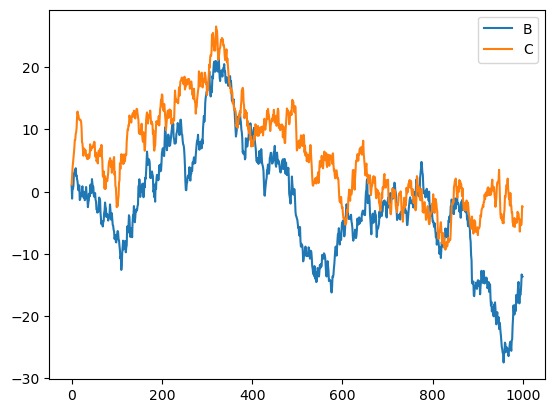

In [35]:
import matplotlib.pyplot as plt

# Line plot
df6 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df6.plot()
plt.show()

### 11. **I/O Operations**

**Reading/Writing CSV:**

```python
# Reading from a CSV file
df7 = pd.read_csv('data.csv')

# Writing to a CSV file
df7.to_csv('output.csv')
```

**Reading/Writing Excel:**
```python
# Reading from an Excel file
df8 = pd.read_excel('data.xlsx', sheet_name='Sheet1')

# Writing to an Excel file
df8.to_excel('output.xlsx', sheet_name='Sheet1')
```


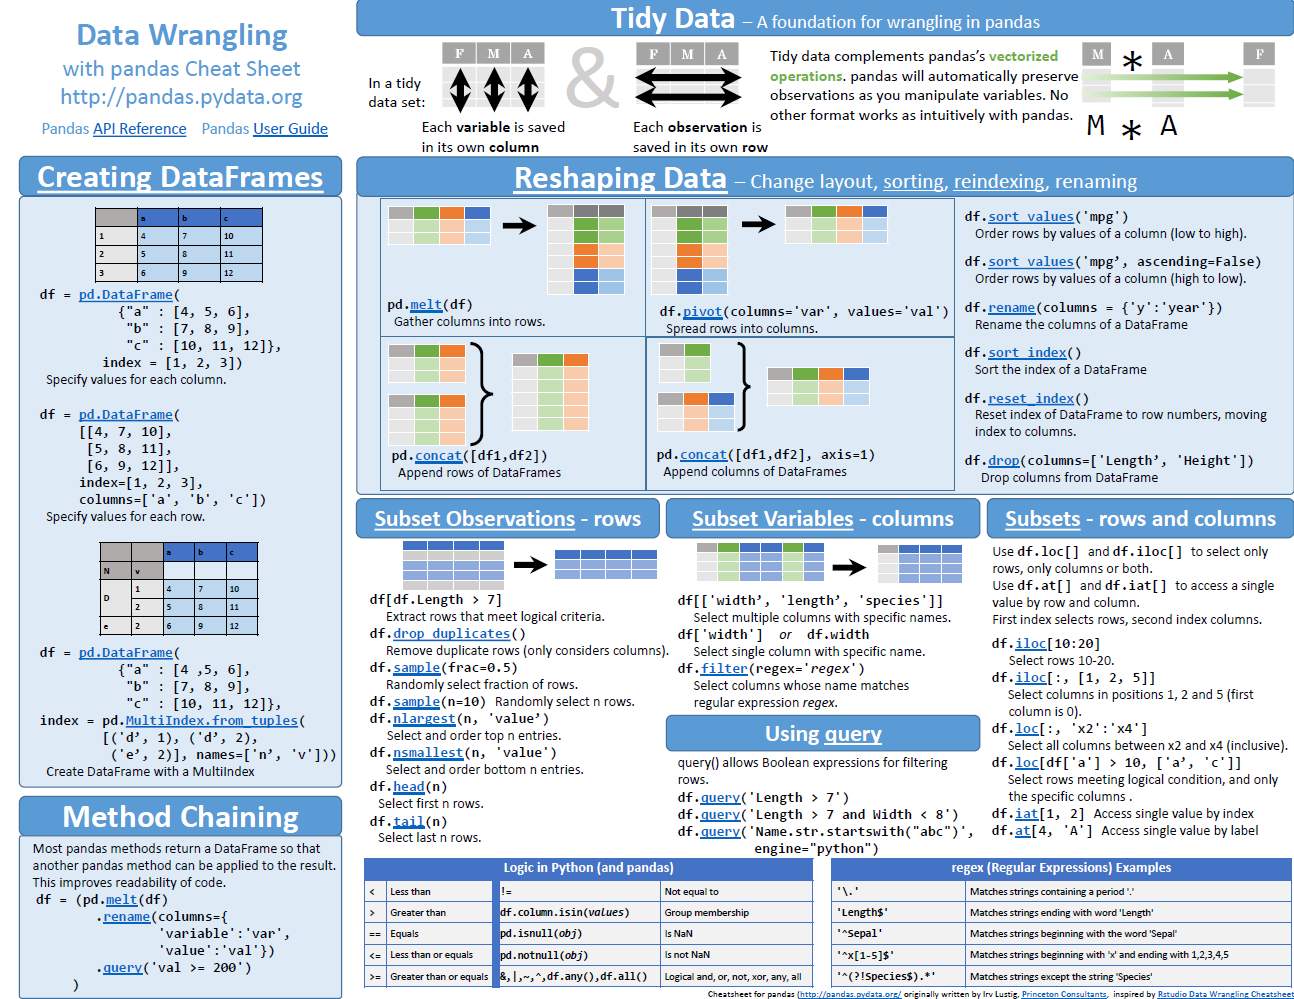

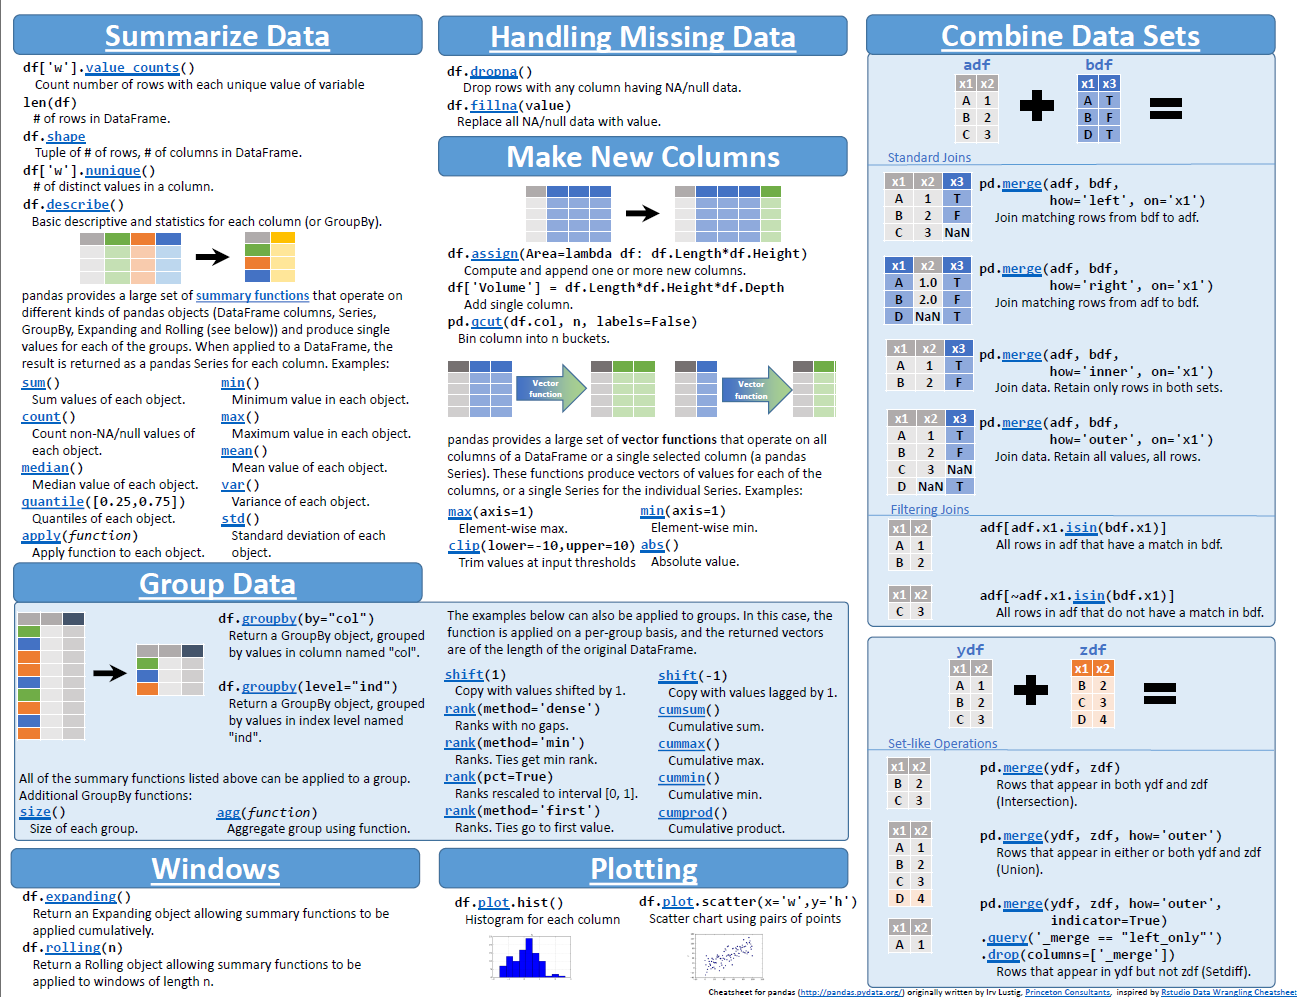